In [1]:
import pandas as pd
df=pd.read_excel("C:/Users/Windows10/Documents/homeprices.xlsx")
df

,town,area,prices
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

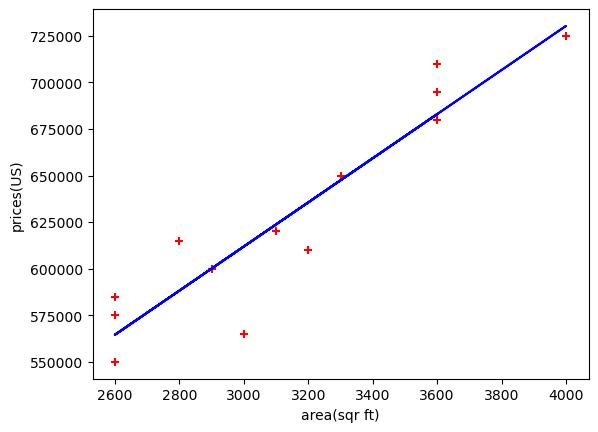

In [6]:
%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('prices(US)')
plt.scatter(df.area,df.prices,color="red",marker="+")
plt.plot(df.area,reg.predict(df[['area']].values),color='blue')

In [5]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']].values,df.prices)

LinearRegression()

In [28]:
dummies=pd.get_dummies(df.town)
#dummies

In [27]:
merged=pd.concat([df,dummies], axis="columns")
#merged

In [9]:
final=merged.drop(["town", "west windsor"], axis="columns")
final

,area,prices,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [10]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [11]:
X=final.drop("prices", axis="columns")
#X

In [12]:
y= final.prices
#y

In [13]:
model.fit(X,y)

LinearRegression()

In [30]:
model.predict([[2900,0,1]]) #2900 sqr ft home in robbinsville

array([74700496.71038112])

In [31]:
model.predict([[3800,0,0]]) #3800 sqr ft home in west windsor

array([97818140.18490155])

In [32]:
model.score(X,y)

0.9573929037221874

In [33]:
#df
#Using sklearn OneHotEncoder

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [35]:
dfle=df
dfle.town=le.fit_transform(dfle.town)
#dfle

In [36]:
X=dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [37]:
y=dfle.prices
#y

In [38]:

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('town', OneHotEncoder(), [0])], remainder = 'passthrough')
X = ct.fit_transform(X)
X

array([[1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [39]:
X=X[:,1:]
X

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [40]:
model.fit(X,y)

LinearRegression()

In [41]:
model.predict([[1,0,2800]])

array([590775.63964739])

In [42]:
model.predict([[0,1,3400]])

array([681241.6684584])